In [1]:
import os
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime
import peakutils
import math
#from moviepy.editor import *
import cv2
import scipy.stats as stats
#important for text to be detected when importing saved figures into illustrator
import matplotlib
matplotlib.rcParams['pdf.fonttype']=42
matplotlib.rcParams['ps.fonttype']=42

In [ ]:
rootpath = r"...\Data\Figure 6"
figurepath = os.path.join(rootpath,"figure")
metapath = os.path.join(rootpath,"meta")
datapath = os.path.join(rootpath,"data")
statspath = os.path.join(rootpath,"stats")
for x in [figurepath,datapath,metapath,statspath]:
    if not os.path.exists(x):
        os.mkdir(x)

In [3]:
metainfo = pd.read_csv(os.path.join(metapath,'Self_paced_mating_metainfo.csv'),index_col = False)


In [4]:
# Load the data
# merge_df is a concatenated data frame of all DeepLabCut tracking data processed in ROI analysis.
merge_df = pd.read_csv(os.path.join(datapath,"merge_df.csv"),index_col = None)

# group_df contains grouped data for each experiment.
# Average time spent in each zone was average across all zone duration
# The other values were summed
group_df = pd.read_csv(os.path.join(datapath,"group_df.csv"),index_col = None)


In [ ]:
# Excel file to store statistical values for manuscript
manuscript_statistic_filepath = os.path.join(r"...\meta","manuscript_statistic.csv")
manuscript_statistic_file = pd.read_csv(manuscript_statistic_filepath,index_col = False)

# Figure 6E

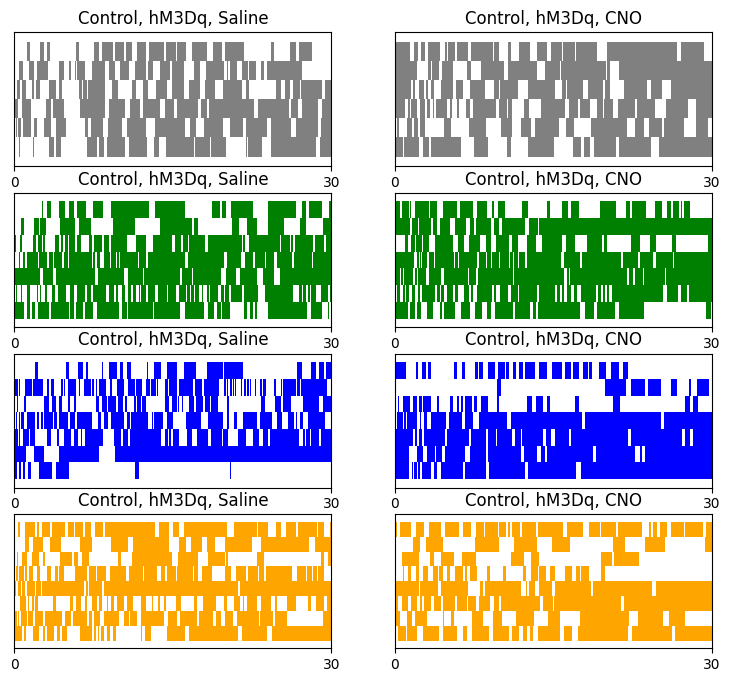

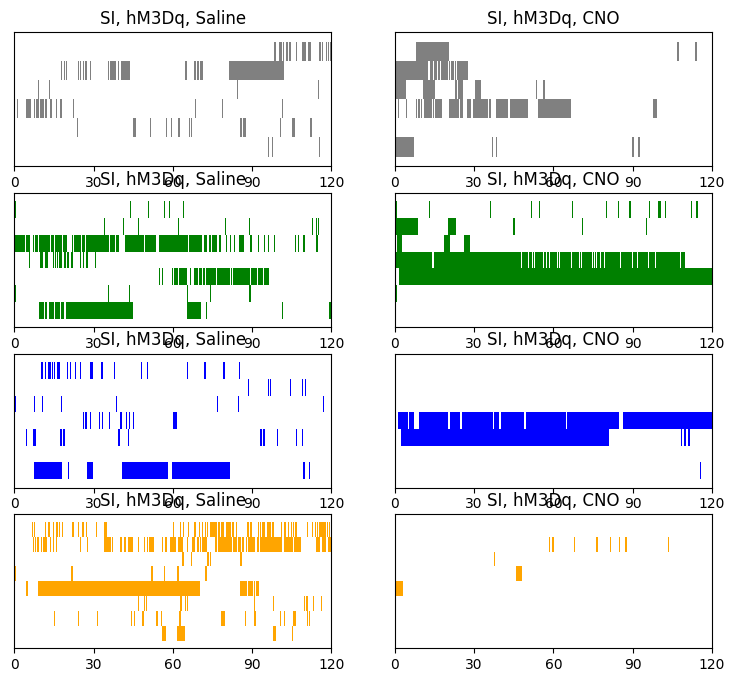

In [6]:
# Plot raster plot showing time in interaction zone
Experiment_type = 'Control'
Group = 'hM3Dq' 
State = 'CNO'
Type = 'Interaction_zone'
for Experiment_type in metainfo.Experiment_type.unique():
    fig,ax = plt.subplots(4,2,figsize = (3*3,4*2))

    for gidx, Stim_Group in enumerate(['Post_ejaculatory_eYFP','Appetitive_hM3Dq','Consummatory_hM3Dq','Post_ejaculatory_hM3Dq']):
        for sidx,State in enumerate(['Saline','CNO']):
            tempdf = metainfo[(metainfo.Experiment_type == Experiment_type)&(metainfo.Stim_Group == Stim_Group)\
                                 &(metainfo.State == State)]
            if Stim_Group == 'Post_ejaculatory_eYFP':
                color = 'gray'
            elif Stim_Group == 'Appetitive_hM3Dq':
                color = 'green'
            elif Stim_Group == 'Consummatory_hM3Dq':
                color = 'blue'
            elif Stim_Group == 'Post_ejaculatory_hM3Dq':
                color = 'orange'                
            axs = ax[gidx,sidx,]

            for idx,filename in enumerate(tempdf.sort_values(by = 'ID').filename):
                
                subsetdf = merge_df[(merge_df.filename == filename)&(merge_df.Type == Type)]
                #if Experiment_type == 'SI':
                #    print(subsetdf.head())
                [axs.fill_betweenx([idx-0.5,idx + 0.5],x1 = entry,x2 = exit,color = color,alpha = 1,lw = 0) for entry,exit in \
                 subsetdf.loc[subsetdf.Type == Type,['Entry_frame','Exit_frame']].values]
            Offset_frame = metainfo[metainfo.filename == filename].Offset_frame.values[0]
            if Offset_frame == 15*60*120:
                nticks = 5
            else:
                nticks = 2

            nanimals = metainfo[(metainfo.Experiment_type == Experiment_type) &(metainfo.Stim_Group == Stim_Group) &(metainfo.State == State)].shape[0]
            axs.set_xticks(np.linspace(0,Offset_frame,nticks))    
            axs.set_xticklabels(np.linspace(0//(15*60),Offset_frame//(15*60),nticks,dtype = 'int'))

            axs.set_yticks([])
            axs.set_ylim(-1, nanimals)
            axs.set_xlim(0, Offset_frame)
            axs.set_title(', '.join([Experiment_type,Group,State]))

    fig.savefig(os.path.join(figurepath,'Figure6E_{}.png'.format(Experiment_type)),bbox_inches='tight',dpi = 216)
    fig.savefig(os.path.join(figurepath,'Figure6E_{}.pdf'.format(Experiment_type)),bbox_inches='tight') 

# Figure 6F

C:\Users\stuberadmin\AppData\Local\Temp;\ipykernel_52716\4254971384.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  [ax.set_xticklabels(['CNO','Saline'],rotation = -45) for ax in axs]


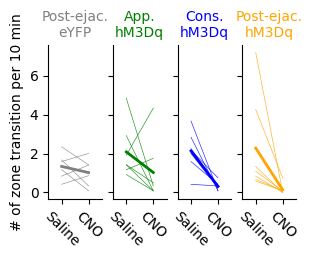

In [7]:
figlabel = 'Figure6F'
variable = 'Number_of_zone_transition_per_10min'

tempdf = group_df[group_df.Experiment_type == 'SI']

xlen = 4
fig,axs = plt.subplots(1,xlen,figsize = (xlen*0.8,2),sharey = True,sharex= True)

sns.lineplot(data = tempdf[tempdf.Stim_Group == 'Post_ejaculatory_eYFP'],y = variable,\
                x = 'drug',ax = axs[0],err_style = None,lw = 2,color = 'gray',)
sns.lineplot(data = tempdf[tempdf.Stim_Group == 'Post_ejaculatory_eYFP'],y = variable,\
                x = 'drug',ax = axs[0],estimator = None,units = 'ID',lw = 0.5,alpha = 0.8,color = 'gray')
sns.lineplot(data = tempdf[tempdf.Stim_Group == 'Appetitive_hM3Dq'],y = variable,\
                x = 'drug',ax = axs[1],err_style = None,lw = 2,color = 'green')
sns.lineplot(data = tempdf[tempdf.Stim_Group == 'Appetitive_hM3Dq'],y = variable,\
                x = 'drug',ax = axs[1],estimator = None,units = 'ID',lw = 0.5,alpha = 0.8,color = 'green')  
sns.lineplot(data = tempdf[tempdf.Stim_Group == 'Consummatory_hM3Dq'],y = variable,\
                x = 'drug',ax = axs[2],err_style = None,lw = 2,color = 'blue')
sns.lineplot(data = tempdf[tempdf.Stim_Group == 'Consummatory_hM3Dq'],y = variable,\
                x = 'drug',ax = axs[2],estimator = None,units = 'ID',lw = 0.5,alpha = 0.8,color = 'blue')      
sns.lineplot(data = tempdf[tempdf.Stim_Group == 'Post_ejaculatory_hM3Dq'],y = variable,\
                x = 'drug',ax = axs[3],err_style = None,lw = 2,color = 'orange')
sns.lineplot(data = tempdf[tempdf.Stim_Group == 'Post_ejaculatory_hM3Dq'],y = variable,\
                x = 'drug',ax = axs[3],estimator = None,units = 'ID',lw = 0.5,alpha = 0.8,color = 'orange')  
sns.despine()
[ax.set_xlim(1.5,-0.5) for ax in axs]
[ax.set_xlabel('') for ax in axs]
[ax.set_xticklabels(['CNO','Saline'],rotation = -45) for ax in axs]
[ax.set_title(title,fontsize = 10,color = color) for ax,title,color in zip(axs,['Post-ejac.\neYFP', 'App.\nhM3Dq', 'Cons.\nhM3Dq', 'Post-ejac.\nhM3Dq'],['gray','green','blue','orange'])]
axs[0].set_ylabel('# of zone transition per 10 min')

fig.savefig(os.path.join(figurepath,f'{figlabel}.png'),bbox_inches='tight',dpi = 216)
fig.savefig(os.path.join(figurepath,f'{figlabel}.pdf'),bbox_inches='tight')    


In [8]:
import statsmodels.stats.multitest as mlt

group1 = 'Saline'
group2 = 'CNO'
figlabel = 'Figure6F'

tempdf = group_df[group_df.Experiment_type == 'SI']
print(variable)
pvalues = []
statistics = []
for Stim_Group in tempdf.Stim_Group.unique():
    cnt = tempdf.loc[(tempdf.drug == group1)&(tempdf.Stim_Group == Stim_Group),variable].values
    cno = tempdf.loc[(tempdf.drug == group2)&(tempdf.Stim_Group == Stim_Group),variable].values
    # Determine the sample size for each group (often shown as "n" in non-parametric tests)

    st,p = stats.wilcoxon(cnt,cno)
    pvalues.append(p)
    statistics.append(st)
    
print(pvalues)
multiple_wilcoxon_6F = mlt.multipletests(pvalues,method = 'bonferroni')
(significance,corr_pvals, __ , __ ) = multiple_wilcoxon_6F

# print the results
for sidx,Stim_Group in enumerate(tempdf.Stim_Group.unique()):
    print(Stim_Group,corr_pvals[sidx])
    cnt = tempdf.loc[(tempdf.drug == group1)&(tempdf.Stim_Group == Stim_Group),variable].values
    cno = tempdf.loc[(tempdf.drug == group2)&(tempdf.Stim_Group == Stim_Group),variable].values
    n_cnt = len(cnt)
    n_cno = len(cno)

    # Append the Wilcoxon result to manuscript_statistic_file
    wilcoxon_data = pd.DataFrame([{
        'Figure': figlabel,
        'variable':variable,
        'Type of Test': 'Two-way Wilcoxon signed-rank test',
        'Detail': f'{Stim_Group}; {group1} vs {group2}',
        'statistic description': f'W(n={n_cnt})',  # Showing "n" for each group
        'statistic': statistics[sidx],
        'p Value': corr_pvals[sidx]
    }])
    # Concatenate to the results DataFrame
    manuscript_statistic_file = pd.concat([manuscript_statistic_file, wilcoxon_data], ignore_index=True)

# save results
import pickle
with open(os.path.join(statspath,'Figure6F_wilcoxon_multitest.pickle'), 'wb') as handle:
    pickle.dump(multiple_wilcoxon_6F, handle, protocol=pickle.HIGHEST_PROTOCOL)

Number_of_zone_transition_per_10min
[0.0078125, 0.4375, 0.21875, 0.015625]
Post_ejaculatory_hM3Dq 0.03125
Post_ejaculatory_eYFP 1.0
Appetitive_hM3Dq 0.875
Consummatory_hM3Dq 0.0625


# Figure 6G

C:\Users\stuberadmin\AppData\Local\Temp;\ipykernel_52716\606810505.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tempdf['Duration_second'] = tempdf['Duration_second']/(60)
C:\Users\stuberadmin\AppData\Local\Temp;\ipykernel_52716\606810505.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  [ax.set_xticklabels(['CNO','Saline'],rotation = -45) for ax in axs]


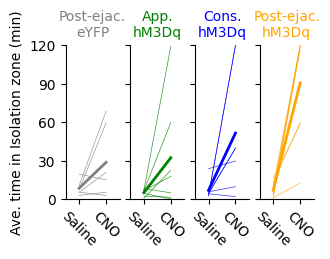

In [9]:
variable = 'Duration_second'

tempdf = group_df[group_df.Experiment_type == 'SI']
# convert into minutes by dividing with frame and seconds
tempdf['Duration_second'] = tempdf['Duration_second']/(60)

xlen = 4

fig,axs = plt.subplots(1,xlen,figsize = (xlen*0.8,2),sharey = True,sharex= True)

sns.lineplot(data = tempdf[tempdf.Stim_Group == 'Post_ejaculatory_eYFP'],y = variable,\
                x = 'drug',ax = axs[0],err_style = None,lw = 2,color = 'gray',)
sns.lineplot(data = tempdf[tempdf.Stim_Group == 'Post_ejaculatory_eYFP'],y = variable,\
                x = 'drug',ax = axs[0],estimator = None,units = 'ID',lw = 0.5,alpha = 0.8,color = 'gray')
sns.lineplot(data = tempdf[tempdf.Stim_Group == 'Appetitive_hM3Dq'],y = variable,\
                x = 'drug',ax = axs[1],err_style = None,lw = 2,color = 'green')
sns.lineplot(data = tempdf[tempdf.Stim_Group == 'Appetitive_hM3Dq'],y = variable,\
                x = 'drug',ax = axs[1],estimator = None,units = 'ID',lw = 0.5,alpha = 0.8,color = 'green')
sns.lineplot(data = tempdf[tempdf.Stim_Group == 'Consummatory_hM3Dq'],y = variable,\
                x = 'drug',ax = axs[2],err_style = None,lw = 2,color = 'blue')
sns.lineplot(data = tempdf[tempdf.Stim_Group == 'Consummatory_hM3Dq'],y = variable,\
                x = 'drug',ax = axs[2],estimator = None,units = 'ID',lw = 0.5,alpha = 0.8,color = 'blue')                        
sns.lineplot(data = tempdf[tempdf.Stim_Group == 'Post_ejaculatory_hM3Dq'],y = variable,\
                x = 'drug',ax = axs[3],err_style = None,lw = 2,color = 'orange')
sns.lineplot(data = tempdf[tempdf.Stim_Group == 'Post_ejaculatory_hM3Dq'],y = variable,\
                x = 'drug',ax = axs[3],estimator = None,units = 'ID',lw = 0.5,alpha = 0.8,color = 'orange')  
sns.despine()
[ax.set_xlim(1.5,-0.5) for ax in axs]
[ax.set_xlabel('') for ax in axs]
[ax.set_xticklabels(['CNO','Saline'],rotation = -45) for ax in axs]
[ax.set_yticks(np.linspace(0,120,5)) for ax in axs]
[ax.set_ylim(0,120) for ax in axs]
[ax.set_title(title,fontsize = 10,color = color) for ax,title,color in zip(axs,['Post-ejac.\neYFP', 'App.\nhM3Dq', 'Cons.\nhM3Dq', 'Post-ejac.\nhM3Dq'],['gray','green','blue','orange'])]

axs[0].set_ylabel('Ave. time in Isolation zone (min)')

fig.savefig(os.path.join(figurepath,'Figure6G.png'),bbox_inches='tight',dpi = 216)
fig.savefig(os.path.join(figurepath,'Figure6G.pdf'),bbox_inches='tight')    


In [10]:
import statsmodels.stats.multitest as mlt

group1 = 'Saline'
group2 = 'CNO'
figlabel = 'Figure6G'

tempdf = group_df[group_df.Experiment_type == 'SI']
print(variable)
pvalues = []
statistics = []
for Stim_Group in tempdf.Stim_Group.unique():
    cnt = tempdf.loc[(tempdf.drug == group1)&(tempdf.Stim_Group == Stim_Group),variable].values
    cno = tempdf.loc[(tempdf.drug == group2)&(tempdf.Stim_Group == Stim_Group),variable].values
    # Determine the sample size for each group (often shown as "n" in non-parametric tests)

    st,p = stats.wilcoxon(cnt,cno)
    pvalues.append(p)
    statistics.append(st)
    
print(pvalues)
multiple_wilcoxon = mlt.multipletests(pvalues,method = 'bonferroni')
(significance,corr_pvals, __ , __ ) = multiple_wilcoxon

# print the results
for sidx,Stim_Group in enumerate(tempdf.Stim_Group.unique()):
    print(Stim_Group,corr_pvals[sidx])
    cnt = tempdf.loc[(tempdf.drug == group1)&(tempdf.Stim_Group == Stim_Group),variable].values
    cno = tempdf.loc[(tempdf.drug == group2)&(tempdf.Stim_Group == Stim_Group),variable].values
    n_cnt = len(cnt)
    n_cno = len(cno)

    # Append the Wilcoxon result to manuscript_statistic_file
    wilcoxon_data = pd.DataFrame([{
        'Figure': figlabel,
        'variable':variable,
        'Type of Test': 'Two-way Wilcoxon signed-rank test',
        'Detail': f'{Stim_Group}; {group1} vs {group2}',
        'statistic description': f'W(n={n_cnt})',  # Showing "n" for each group
        'statistic': statistics[sidx],
        'p Value': corr_pvals[sidx]
    }])
    # Concatenate to the results DataFrame
    manuscript_statistic_file = pd.concat([manuscript_statistic_file, wilcoxon_data], ignore_index=True)

# save results
import pickle
with open(os.path.join(statspath,f'{figlabel}_wilcoxon_multitest.pickle'), 'wb') as handle:
    pickle.dump(multiple_wilcoxon, handle, protocol=pickle.HIGHEST_PROTOCOL)

Duration_second
[0.0078125, 0.3125, 0.21875, 0.03125]
Post_ejaculatory_hM3Dq 0.03125
Post_ejaculatory_eYFP 1.0
Appetitive_hM3Dq 0.875
Consummatory_hM3Dq 0.125


# Figure 6H

C:\Users\stuberadmin\AppData\Local\Temp;\ipykernel_52716\4150684034.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  [ax.set_xticklabels(['CNO','Saline'],rotation = -45) for ax in axs]


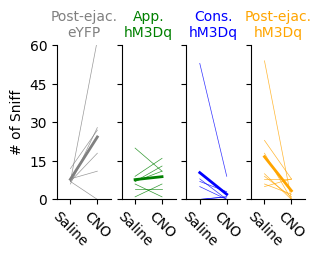

In [11]:
variable = 'Sniff_event'

tempdf = group_df[group_df.Experiment_type == 'SI']
# convert into minutes by dividing with frame and seconds

xlen = 4

fig,axs = plt.subplots(1,xlen,figsize = (xlen*0.8,2),sharey = True,sharex= True)

sns.lineplot(data = tempdf[tempdf.Stim_Group == 'Post_ejaculatory_eYFP'],y = variable,\
                x = 'drug',ax = axs[0],err_style = None,lw = 2,color = 'gray',)
sns.lineplot(data = tempdf[tempdf.Stim_Group == 'Post_ejaculatory_eYFP'],y = variable,\
                x = 'drug',ax = axs[0],estimator = None,units = 'ID',lw = 0.5,alpha = 0.8,color = 'gray')
sns.lineplot(data = tempdf[tempdf.Stim_Group == 'Appetitive_hM3Dq'],y = variable,\
                x = 'drug',ax = axs[1],err_style = None,lw = 2,color = 'green')
sns.lineplot(data = tempdf[tempdf.Stim_Group == 'Appetitive_hM3Dq'],y = variable,\
                x = 'drug',ax = axs[1],estimator = None,units = 'ID',lw = 0.5,alpha = 0.8,color = 'green')
sns.lineplot(data = tempdf[tempdf.Stim_Group == 'Consummatory_hM3Dq'],y = variable,\
                x = 'drug',ax = axs[2],err_style = None,lw = 2,color = 'blue')
sns.lineplot(data = tempdf[tempdf.Stim_Group == 'Consummatory_hM3Dq'],y = variable,\
                x = 'drug',ax = axs[2],estimator = None,units = 'ID',lw = 0.5,alpha = 0.8,color = 'blue')                        
sns.lineplot(data = tempdf[tempdf.Stim_Group == 'Post_ejaculatory_hM3Dq'],y = variable,\
                x = 'drug',ax = axs[3],err_style = None,lw = 2,color = 'orange')
sns.lineplot(data = tempdf[tempdf.Stim_Group == 'Post_ejaculatory_hM3Dq'],y = variable,\
                x = 'drug',ax = axs[3],estimator = None,units = 'ID',lw = 0.5,alpha = 0.8,color = 'orange')  
sns.despine()
[ax.set_xlim(1.5,-0.5) for ax in axs]
[ax.set_xlabel('') for ax in axs]
[ax.set_xticklabels(['CNO','Saline'],rotation = -45) for ax in axs]
[ax.set_yticks(np.linspace(0,60,5)) for ax in axs]
[ax.set_ylim(0,60) for ax in axs]
[ax.set_title(title,fontsize = 10,color = color) for ax,title,color in zip(axs,['Post-ejac.\neYFP', 'App.\nhM3Dq', 'Cons.\nhM3Dq', 'Post-ejac.\nhM3Dq'],['gray','green','blue','orange'])]


#fig.savefig(os.path.join(figurepath,'Figure6G.png'),bbox_inches='tight',dpi = 216)
#fig.savefig(os.path.join(figurepath,'Figure6G.pdf'),bbox_inches='tight')    


axs[0].set_ylabel('# of Sniff')

fig.savefig(os.path.join(figurepath,'Figure6H.png'),bbox_inches='tight',dpi = 216)
fig.savefig(os.path.join(figurepath,'Figure6H.pdf'),bbox_inches='tight')    


In [12]:
import statsmodels.stats.multitest as mlt

group1 = 'Saline'
group2 = 'CNO'
figlabel = 'Figure6H'

tempdf = group_df[group_df.Experiment_type == 'SI']
print(variable)
pvalues = []
statistics = []
for Stim_Group in tempdf.Stim_Group.unique():
    cnt = tempdf.loc[(tempdf.drug == group1)&(tempdf.Stim_Group == Stim_Group),variable].values
    cno = tempdf.loc[(tempdf.drug == group2)&(tempdf.Stim_Group == Stim_Group),variable].values
    # Determine the sample size for each group (often shown as "n" in non-parametric tests)

    st,p = stats.wilcoxon(cnt,cno)
    pvalues.append(p)
    statistics.append(st)
    
print(pvalues)
multiple_wilcoxon = mlt.multipletests(pvalues,method = 'bonferroni')
(significance,corr_pvals, __ , __ ) = multiple_wilcoxon

# print the results
for sidx,Stim_Group in enumerate(tempdf.Stim_Group.unique()):
    print(Stim_Group,corr_pvals[sidx])
    cnt = tempdf.loc[(tempdf.drug == group1)&(tempdf.Stim_Group == Stim_Group),variable].values
    cno = tempdf.loc[(tempdf.drug == group2)&(tempdf.Stim_Group == Stim_Group),variable].values
    n_cnt = len(cnt)
    n_cno = len(cno)

    # Append the Wilcoxon result to manuscript_statistic_file
    wilcoxon_data = pd.DataFrame([{
        'Figure': figlabel,
        'variable':variable,
        'Type of Test': 'Two-way Wilcoxon signed-rank test',
        'Detail': f'{Stim_Group}; {group1} vs {group2}',
        'statistic description': f'W(n={n_cnt})',  # Showing "n" for each group
        'statistic': statistics[sidx],
        'p Value': corr_pvals[sidx]
    }])
    # Concatenate to the results DataFrame
    manuscript_statistic_file = pd.concat([manuscript_statistic_file, wilcoxon_data], ignore_index=True)

# save results
import pickle
with open(os.path.join(statspath,f'{figlabel}_wilcoxon_multitest.pickle'), 'wb') as handle:
    pickle.dump(multiple_wilcoxon, handle, protocol=pickle.HIGHEST_PROTOCOL)

Sniff_event
[0.027991815485665747, 0.09375, 0.6741416549927048, 0.11484960926328613]
Post_ejaculatory_hM3Dq 0.11196726194266299
Post_ejaculatory_eYFP 0.375
Appetitive_hM3Dq 1.0
Consummatory_hM3Dq 0.45939843705314454


c:\Users\stuberadmin\anaconda3\envs\cellpose\lib\site-packages\scipy\stats\_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
c:\Users\stuberadmin\anaconda3\envs\cellpose\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


# Figure 6I

C:\Users\stuberadmin\AppData\Local\Temp;\ipykernel_52716\2670560839.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  [ax.set_xticklabels(['CNO','Saline'],rotation = -45) for ax in axs]


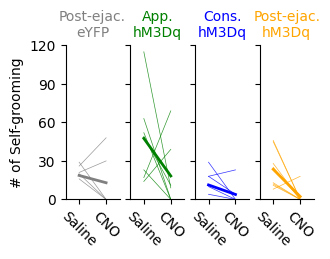

In [13]:
variable = 'Grooming_event'

tempdf = group_df[group_df.Experiment_type == 'SI']
# convert into minutes by dividing with frame and seconds

xlen = 4

fig,axs = plt.subplots(1,xlen,figsize = (xlen*0.8,2),sharey = True,sharex= True)

sns.lineplot(data = tempdf[tempdf.Stim_Group == 'Post_ejaculatory_eYFP'],y = variable,\
                x = 'drug',ax = axs[0],err_style = None,lw = 2,color = 'gray',)
sns.lineplot(data = tempdf[tempdf.Stim_Group == 'Post_ejaculatory_eYFP'],y = variable,\
                x = 'drug',ax = axs[0],estimator = None,units = 'ID',lw = 0.5,alpha = 0.8,color = 'gray')
sns.lineplot(data = tempdf[tempdf.Stim_Group == 'Appetitive_hM3Dq'],y = variable,\
                x = 'drug',ax = axs[1],err_style = None,lw = 2,color = 'green')
sns.lineplot(data = tempdf[tempdf.Stim_Group == 'Appetitive_hM3Dq'],y = variable,\
                x = 'drug',ax = axs[1],estimator = None,units = 'ID',lw = 0.5,alpha = 0.8,color = 'green')
sns.lineplot(data = tempdf[tempdf.Stim_Group == 'Consummatory_hM3Dq'],y = variable,\
                x = 'drug',ax = axs[2],err_style = None,lw = 2,color = 'blue')
sns.lineplot(data = tempdf[tempdf.Stim_Group == 'Consummatory_hM3Dq'],y = variable,\
                x = 'drug',ax = axs[2],estimator = None,units = 'ID',lw = 0.5,alpha = 0.8,color = 'blue')                        
sns.lineplot(data = tempdf[tempdf.Stim_Group == 'Post_ejaculatory_hM3Dq'],y = variable,\
                x = 'drug',ax = axs[3],err_style = None,lw = 2,color = 'orange')
sns.lineplot(data = tempdf[tempdf.Stim_Group == 'Post_ejaculatory_hM3Dq'],y = variable,\
                x = 'drug',ax = axs[3],estimator = None,units = 'ID',lw = 0.5,alpha = 0.8,color = 'orange')  
sns.despine()
[ax.set_xlim(1.5,-0.5) for ax in axs]
[ax.set_xlabel('') for ax in axs]
[ax.set_xticklabels(['CNO','Saline'],rotation = -45) for ax in axs]
[ax.set_yticks(np.linspace(0,120,5)) for ax in axs]
[ax.set_ylim(0,120) for ax in axs]
[ax.set_title(title,fontsize = 10,color = color) for ax,title,color in zip(axs,['Post-ejac.\neYFP', 'App.\nhM3Dq', 'Cons.\nhM3Dq', 'Post-ejac.\nhM3Dq'],['gray','green','blue','orange'])]


axs[0].set_ylabel('# of Self-grooming')

fig.savefig(os.path.join(figurepath,'Figure6I.png'),bbox_inches='tight',dpi = 216)
fig.savefig(os.path.join(figurepath,'Figure6I.pdf'),bbox_inches='tight')    


In [14]:
import statsmodels.stats.multitest as mlt

group1 = 'Saline'
group2 = 'CNO'
figlabel = 'Figure6I'

tempdf = group_df[group_df.Experiment_type == 'SI']
print(variable)
pvalues = []
statistics = []
for Stim_Group in tempdf.Stim_Group.unique():
    cnt = tempdf.loc[(tempdf.drug == group1)&(tempdf.Stim_Group == Stim_Group),variable].values
    cno = tempdf.loc[(tempdf.drug == group2)&(tempdf.Stim_Group == Stim_Group),variable].values
    # Determine the sample size for each group (often shown as "n" in non-parametric tests)

    st,p = stats.wilcoxon(cnt,cno)
    pvalues.append(p)
    statistics.append(st)
    
print(pvalues)
multiple_wilcoxon = mlt.multipletests(pvalues,method = 'bonferroni')
(significance,corr_pvals, __ , __ ) = multiple_wilcoxon

# print the results
for sidx,Stim_Group in enumerate(tempdf.Stim_Group.unique()):
    print(Stim_Group,corr_pvals[sidx])
    cnt = tempdf.loc[(tempdf.drug == group1)&(tempdf.Stim_Group == Stim_Group),variable].values
    cno = tempdf.loc[(tempdf.drug == group2)&(tempdf.Stim_Group == Stim_Group),variable].values
    n_cnt = len(cnt)
    n_cno = len(cno)

    # Append the Wilcoxon result to manuscript_statistic_file
    wilcoxon_data = pd.DataFrame([{
        'Figure': figlabel,
        'variable':variable,
        'Type of Test': 'Two-way Wilcoxon signed-rank test',
        'Detail': f'{Stim_Group}; {group1} vs {group2}',
        'statistic description': f'W(n={n_cnt})',  # Showing "n" for each group
        'statistic': statistics[sidx],
        'p Value': corr_pvals[sidx]
    }])
    # Concatenate to the results DataFrame
    manuscript_statistic_file = pd.concat([manuscript_statistic_file, wilcoxon_data], ignore_index=True)

# save results
import pickle
with open(os.path.join(statspath,f'{figlabel}_wilcoxon_multitest.pickle'), 'wb') as handle:
    pickle.dump(multiple_wilcoxon, handle, protocol=pickle.HIGHEST_PROTOCOL)

Grooming_event
[0.015625, 0.5001842570707944, 0.296875, 0.13801073756865953]
Post_ejaculatory_hM3Dq 0.0625
Post_ejaculatory_eYFP 1.0
Appetitive_hM3Dq 1.0
Consummatory_hM3Dq 0.5520429502746381


c:\Users\stuberadmin\anaconda3\envs\cellpose\lib\site-packages\scipy\stats\_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
c:\Users\stuberadmin\anaconda3\envs\cellpose\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


# Figure 6J

C:\Users\stuberadmin\AppData\Local\Temp;\ipykernel_52716\2626843151.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  [ax.set_xticklabels(['CNO','Saline'],rotation = -45) for ax in axs]


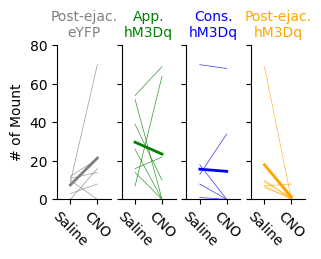

In [15]:
variable = 'Mount_event'

xlen = 4

fig,axs = plt.subplots(1,xlen,figsize = (xlen*0.8,2),sharey = True,sharex= True)

sns.lineplot(data = tempdf[tempdf.Stim_Group == 'Post_ejaculatory_eYFP'],y = variable,\
                x = 'drug',ax = axs[0],err_style = None,lw = 2,color = 'gray',)
sns.lineplot(data = tempdf[tempdf.Stim_Group == 'Post_ejaculatory_eYFP'],y = variable,\
                x = 'drug',ax = axs[0],estimator = None,units = 'ID',lw = 0.5,alpha = 0.8,color = 'gray')
sns.lineplot(data = tempdf[tempdf.Stim_Group == 'Appetitive_hM3Dq'],y = variable,\
                x = 'drug',ax = axs[1],err_style = None,lw = 2,color = 'green')
sns.lineplot(data = tempdf[tempdf.Stim_Group == 'Appetitive_hM3Dq'],y = variable,\
                x = 'drug',ax = axs[1],estimator = None,units = 'ID',lw = 0.5,alpha = 0.8,color = 'green')
sns.lineplot(data = tempdf[tempdf.Stim_Group == 'Consummatory_hM3Dq'],y = variable,\
                x = 'drug',ax = axs[2],err_style = None,lw = 2,color = 'blue')
sns.lineplot(data = tempdf[tempdf.Stim_Group == 'Consummatory_hM3Dq'],y = variable,\
                x = 'drug',ax = axs[2],estimator = None,units = 'ID',lw = 0.5,alpha = 0.8,color = 'blue')                        
sns.lineplot(data = tempdf[tempdf.Stim_Group == 'Post_ejaculatory_hM3Dq'],y = variable,\
                x = 'drug',ax = axs[3],err_style = None,lw = 2,color = 'orange')
sns.lineplot(data = tempdf[tempdf.Stim_Group == 'Post_ejaculatory_hM3Dq'],y = variable,\
                x = 'drug',ax = axs[3],estimator = None,units = 'ID',lw = 0.5,alpha = 0.8,color = 'orange')  
sns.despine()
[ax.set_xlim(1.5,-0.5) for ax in axs]
[ax.set_xlabel('') for ax in axs]
[ax.set_xticklabels(['CNO','Saline'],rotation = -45) for ax in axs]
[ax.set_yticks(np.linspace(0,80,5)) for ax in axs]
[ax.set_ylim(0,80) for ax in axs]
[ax.set_title(title,fontsize = 10,color = color) for ax,title,color in zip(axs,['Post-ejac.\neYFP', 'App.\nhM3Dq', 'Cons.\nhM3Dq', 'Post-ejac.\nhM3Dq'],['gray','green','blue','orange'])]

axs[0].set_ylabel('# of Mount')

fig.savefig(os.path.join(figurepath,'Figure6J.png'),bbox_inches='tight',dpi = 216)
fig.savefig(os.path.join(figurepath,'Figure6J.pdf'),bbox_inches='tight')    


In [16]:
import statsmodels.stats.multitest as mlt

group1 = 'Saline'
group2 = 'CNO'
figlabel = 'Figure6J'

tempdf = group_df[group_df.Experiment_type == 'SI']
print(variable)
pvalues = []
statistics = []
for Stim_Group in tempdf.Stim_Group.unique():
    cnt = tempdf.loc[(tempdf.drug == group1)&(tempdf.Stim_Group == Stim_Group),variable].values
    cno = tempdf.loc[(tempdf.drug == group2)&(tempdf.Stim_Group == Stim_Group),variable].values
    # Determine the sample size for each group (often shown as "n" in non-parametric tests)

    st,p = stats.wilcoxon(cnt,cno)
    pvalues.append(p)
    statistics.append(st)
    
print(pvalues)
multiple_wilcoxon = mlt.multipletests(pvalues,method = 'bonferroni')
(significance,corr_pvals, __ , __ ) = multiple_wilcoxon

# print the results
for sidx,Stim_Group in enumerate(tempdf.Stim_Group.unique()):
    print(Stim_Group,corr_pvals[sidx])
    cnt = tempdf.loc[(tempdf.drug == group1)&(tempdf.Stim_Group == Stim_Group),variable].values
    cno = tempdf.loc[(tempdf.drug == group2)&(tempdf.Stim_Group == Stim_Group),variable].values
    n_cnt = len(cnt)
    n_cno = len(cno)

    # Append the Wilcoxon result to manuscript_statistic_file
    wilcoxon_data = pd.DataFrame([{
        'Figure': figlabel,
        'variable':variable,
        'Type of Test': 'Two-way Wilcoxon signed-rank test',
        'Detail': f'{Stim_Group}; {group1} vs {group2}',
        'statistic description': f'W(n={n_cnt})',  # Showing "n" for each group
        'statistic': statistics[sidx],
        'p Value': corr_pvals[sidx]
    }])
    # Concatenate to the results DataFrame
    manuscript_statistic_file = pd.concat([manuscript_statistic_file, wilcoxon_data], ignore_index=True)

# save results
import pickle
with open(os.path.join(statspath,f'{figlabel}_wilcoxon_multitest.pickle'), 'wb') as handle:
    pickle.dump(multiple_wilcoxon, handle, protocol=pickle.HIGHEST_PROTOCOL)

Mount_event
[0.015625, 0.21875, 0.6875, 0.5001842570707944]
Post_ejaculatory_hM3Dq 0.0625
Post_ejaculatory_eYFP 0.875
Appetitive_hM3Dq 1.0
Consummatory_hM3Dq 1.0


c:\Users\stuberadmin\anaconda3\envs\cellpose\lib\site-packages\scipy\stats\_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
c:\Users\stuberadmin\anaconda3\envs\cellpose\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


# Figure 6K

C:\Users\stuberadmin\AppData\Local\Temp;\ipykernel_52716\240538968.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  [ax.set_xticklabels(['CNO','Saline'],rotation = -45) for ax in axs]


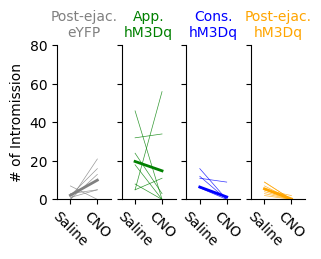

In [17]:
variable = 'Intromission_event'


xlen = 4

fig,axs = plt.subplots(1,xlen,figsize = (xlen*0.8,2),sharey = True,sharex= True)

sns.lineplot(data = tempdf[tempdf.Stim_Group == 'Post_ejaculatory_eYFP'],y = variable,\
                x = 'drug',ax = axs[0],err_style = None,lw = 2,color = 'gray',)
sns.lineplot(data = tempdf[tempdf.Stim_Group == 'Post_ejaculatory_eYFP'],y = variable,\
                x = 'drug',ax = axs[0],estimator = None,units = 'ID',lw = 0.5,alpha = 0.8,color = 'gray')
sns.lineplot(data = tempdf[tempdf.Stim_Group == 'Appetitive_hM3Dq'],y = variable,\
                x = 'drug',ax = axs[1],err_style = None,lw = 2,color = 'green')
sns.lineplot(data = tempdf[tempdf.Stim_Group == 'Appetitive_hM3Dq'],y = variable,\
                x = 'drug',ax = axs[1],estimator = None,units = 'ID',lw = 0.5,alpha = 0.8,color = 'green')
sns.lineplot(data = tempdf[tempdf.Stim_Group == 'Consummatory_hM3Dq'],y = variable,\
                x = 'drug',ax = axs[2],err_style = None,lw = 2,color = 'blue')
sns.lineplot(data = tempdf[tempdf.Stim_Group == 'Consummatory_hM3Dq'],y = variable,\
                x = 'drug',ax = axs[2],estimator = None,units = 'ID',lw = 0.5,alpha = 0.8,color = 'blue')                        
sns.lineplot(data = tempdf[tempdf.Stim_Group == 'Post_ejaculatory_hM3Dq'],y = variable,\
                x = 'drug',ax = axs[3],err_style = None,lw = 2,color = 'orange')
sns.lineplot(data = tempdf[tempdf.Stim_Group == 'Post_ejaculatory_hM3Dq'],y = variable,\
                x = 'drug',ax = axs[3],estimator = None,units = 'ID',lw = 0.5,alpha = 0.8,color = 'orange')  
sns.despine()
[ax.set_xlim(1.5,-0.5) for ax in axs]
[ax.set_xlabel('') for ax in axs]
[ax.set_xticklabels(['CNO','Saline'],rotation = -45) for ax in axs]
[ax.set_yticks(np.linspace(0,80,5)) for ax in axs]
[ax.set_ylim(0,80) for ax in axs]
[ax.set_title(title,fontsize = 10,color = color) for ax,title,color in zip(axs,['Post-ejac.\neYFP', 'App.\nhM3Dq', 'Cons.\nhM3Dq', 'Post-ejac.\nhM3Dq'],['gray','green','blue','orange'])]

axs[0].set_ylabel('# of Intromission')

fig.savefig(os.path.join(figurepath,'Figure6K.png'),bbox_inches='tight',dpi = 216)
fig.savefig(os.path.join(figurepath,'Figure6K.pdf'),bbox_inches='tight')    


In [18]:
import statsmodels.stats.multitest as mlt

group1 = 'Saline'
group2 = 'CNO'
figlabel = 'Figure6K'

tempdf = group_df[group_df.Experiment_type == 'SI']
print(variable)
pvalues = []
statistics = []
for Stim_Group in tempdf.Stim_Group.unique():
    cnt = tempdf.loc[(tempdf.drug == group1)&(tempdf.Stim_Group == Stim_Group),variable].values
    cno = tempdf.loc[(tempdf.drug == group2)&(tempdf.Stim_Group == Stim_Group),variable].values
    # Determine the sample size for each group (often shown as "n" in non-parametric tests)

    st,p = stats.wilcoxon(cnt,cno)
    pvalues.append(p)
    statistics.append(st)
    
print(pvalues)
multiple_wilcoxon = mlt.multipletests(pvalues,method = 'bonferroni')
(significance,corr_pvals, __ , __ ) = multiple_wilcoxon

# print the results
for sidx,Stim_Group in enumerate(tempdf.Stim_Group.unique()):
    print(Stim_Group,corr_pvals[sidx])
    cnt = tempdf.loc[(tempdf.drug == group1)&(tempdf.Stim_Group == Stim_Group),variable].values
    cno = tempdf.loc[(tempdf.drug == group2)&(tempdf.Stim_Group == Stim_Group),variable].values
    n_cnt = len(cnt)
    n_cno = len(cno)

    # Append the Wilcoxon result to manuscript_statistic_file
    wilcoxon_data = pd.DataFrame([{
        'Figure': figlabel,
        'variable':variable,
        'Type of Test': 'Two-way Wilcoxon signed-rank test',
        'Detail': f'{Stim_Group}; {group1} vs {group2}',
        'statistic description': f'W(n={n_cnt})',  # Showing "n" for each group
        'statistic': statistics[sidx],
        'p Value': corr_pvals[sidx]
    }])
    # Concatenate to the results DataFrame
    manuscript_statistic_file = pd.concat([manuscript_statistic_file, wilcoxon_data], ignore_index=True)

# save results
import pickle
with open(os.path.join(statspath,f'{figlabel}_wilcoxon_multitest.pickle'), 'wb') as handle:
    pickle.dump(multiple_wilcoxon, handle, protocol=pickle.HIGHEST_PROTOCOL)

Intromission_event
[0.0078125, 0.15625, 0.578125, 0.06788915486182899]
Post_ejaculatory_hM3Dq 0.03125
Post_ejaculatory_eYFP 0.625
Appetitive_hM3Dq 1.0
Consummatory_hM3Dq 0.27155661944731596


c:\Users\stuberadmin\anaconda3\envs\cellpose\lib\site-packages\scipy\stats\_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
c:\Users\stuberadmin\anaconda3\envs\cellpose\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


# Figure 6L

C:\Users\stuberadmin\AppData\Local\Temp;\ipykernel_52716\2225125467.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  [ax.set_xticklabels(['CNO','Saline'],rotation = -45) for ax in axs]


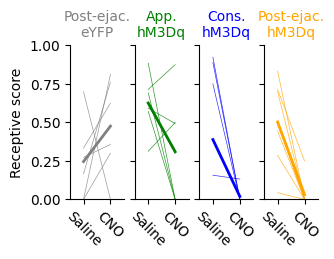

In [19]:
variable = 'Receptive_score'

xlen = 4

fig,axs = plt.subplots(1,xlen,figsize = (xlen*0.8,2),sharey = True,sharex= True)

sns.lineplot(data = tempdf[tempdf.Stim_Group == 'Post_ejaculatory_eYFP'],y = variable,\
                x = 'drug',ax = axs[0],err_style = None,lw = 2,color = 'gray',)
sns.lineplot(data = tempdf[tempdf.Stim_Group == 'Post_ejaculatory_eYFP'],y = variable,\
                x = 'drug',ax = axs[0],estimator = None,units = 'ID',lw = 0.5,alpha = 0.8,color = 'gray')
sns.lineplot(data = tempdf[tempdf.Stim_Group == 'Appetitive_hM3Dq'],y = variable,\
                x = 'drug',ax = axs[1],err_style = None,lw = 2,color = 'green')
sns.lineplot(data = tempdf[tempdf.Stim_Group == 'Appetitive_hM3Dq'],y = variable,\
                x = 'drug',ax = axs[1],estimator = None,units = 'ID',lw = 0.5,alpha = 0.8,color = 'green')
sns.lineplot(data = tempdf[tempdf.Stim_Group == 'Consummatory_hM3Dq'],y = variable,\
                x = 'drug',ax = axs[2],err_style = None,lw = 2,color = 'blue')
sns.lineplot(data = tempdf[tempdf.Stim_Group == 'Consummatory_hM3Dq'],y = variable,\
                x = 'drug',ax = axs[2],estimator = None,units = 'ID',lw = 0.5,alpha = 0.8,color = 'blue')                        
sns.lineplot(data = tempdf[tempdf.Stim_Group == 'Post_ejaculatory_hM3Dq'],y = variable,\
                x = 'drug',ax = axs[3],err_style = None,lw = 2,color = 'orange')
sns.lineplot(data = tempdf[tempdf.Stim_Group == 'Post_ejaculatory_hM3Dq'],y = variable,\
                x = 'drug',ax = axs[3],estimator = None,units = 'ID',lw = 0.5,alpha = 0.8,color = 'orange')  
sns.despine()
[ax.set_xlim(1.5,-0.5) for ax in axs]
[ax.set_xlabel('') for ax in axs]
[ax.set_xticklabels(['CNO','Saline'],rotation = -45) for ax in axs]
[ax.set_yticks(np.linspace(0,1,5)) for ax in axs]
[ax.set_ylim(0,1) for ax in axs]
[ax.set_title(title,fontsize = 10,color = color) for ax,title,color in zip(axs,['Post-ejac.\neYFP', 'App.\nhM3Dq', 'Cons.\nhM3Dq', 'Post-ejac.\nhM3Dq'],['gray','green','blue','orange'])]

axs[0].set_ylabel('Receptive score')

fig.savefig(os.path.join(figurepath,'Figure6L.png'),bbox_inches='tight',dpi = 216)
fig.savefig(os.path.join(figurepath,'Figure6L.pdf'),bbox_inches='tight')    


In [20]:
import statsmodels.stats.multitest as mlt

group1 = 'Saline'
group2 = 'CNO'
figlabel = 'Figure6L'

tempdf = group_df[group_df.Experiment_type == 'SI']
print(variable)
pvalues = []
statistics = []
for Stim_Group in tempdf.Stim_Group.unique():
    cnt = tempdf.loc[(tempdf.drug == group1)&(tempdf.Stim_Group == Stim_Group),variable].values
    cno = tempdf.loc[(tempdf.drug == group2)&(tempdf.Stim_Group == Stim_Group),variable].values
    # Determine the sample size for each group (often shown as "n" in non-parametric tests)

    st,p = stats.wilcoxon(cnt,cno)
    pvalues.append(p)
    statistics.append(st)
    
print(pvalues)
multiple_wilcoxon = mlt.multipletests(pvalues,method = 'bonferroni')
(significance,corr_pvals, __ , __ ) = multiple_wilcoxon

# print the results
for sidx,Stim_Group in enumerate(tempdf.Stim_Group.unique()):
    print(Stim_Group,corr_pvals[sidx])
    cnt = tempdf.loc[(tempdf.drug == group1)&(tempdf.Stim_Group == Stim_Group),variable].values
    cno = tempdf.loc[(tempdf.drug == group2)&(tempdf.Stim_Group == Stim_Group),variable].values
    n_cnt = len(cnt)
    n_cno = len(cno)

    # Append the Wilcoxon result to manuscript_statistic_file
    wilcoxon_data = pd.DataFrame([{
        'Figure': figlabel,
        'variable':variable,
        'Type of Test': 'Two-way Wilcoxon signed-rank test',
        'Detail': f'{Stim_Group}; {group1} vs {group2}',
        'statistic description': f'W(n={n_cnt})',  # Showing "n" for each group
        'statistic': statistics[sidx],
        'p Value': corr_pvals[sidx]
    }])
    # Concatenate to the results DataFrame
    manuscript_statistic_file = pd.concat([manuscript_statistic_file, wilcoxon_data], ignore_index=True)

# save results
import pickle
with open(os.path.join(statspath,f'{figlabel}_wilcoxon_multitest.pickle'), 'wb') as handle:
    pickle.dump(multiple_wilcoxon, handle, protocol=pickle.HIGHEST_PROTOCOL)

Receptive_score
[0.0078125, 0.3125, 0.15625, 0.06788915486182899]
Post_ejaculatory_hM3Dq 0.03125
Post_ejaculatory_eYFP 1.0
Appetitive_hM3Dq 0.625
Consummatory_hM3Dq 0.27155661944731596


c:\Users\stuberadmin\anaconda3\envs\cellpose\lib\site-packages\scipy\stats\_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
c:\Users\stuberadmin\anaconda3\envs\cellpose\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


In [21]:
# Write the stats
manuscript_statistic_file.to_csv(manuscript_statistic_filepath,index = False)